# 囚人のジレンマの格子配置

## Axelrodパッケージのインストール

In [1]:
!pip install axelrod
#!pip install numpy
#!pip install matplotlib

## Axelrodのなど関連ライブラリのインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import axelrod as axl

## 定数の設定

In [3]:
ROWS = 50 #格子の縦の数
COLS = 50 #格子の横の数
NUM_STRATEGY = 3 #使用する戦略の数
NUM_MATCH = 5 #対戦数

#0:C(協調), 1:D(裏切り)

## 戦略の設定
これにより0～12といった番号で戦略を指定できるようにしている

In [4]:
strategy = [axl.Cooperator(),#0
            axl.Alternator(),#1
            axl.Defector(),#2
            axl.Random(),#3
            axl.TitForTat(),#4
            axl.Grudger(),#5
            axl.CyclerDDC(),#6
            axl.CyclerCCD(),#7
            axl.GoByMajority(),#8
            axl.SuspiciousTitForTat(),#8
            axl.Prober(),#10
            axl.OriginalGradual(),#11
            axl.WinStayLoseShift(),#12
            ]

## 各エージェントの周りのエージェントのIDを設定

In [5]:
def SetConnection(A):
    for i in range(ROWS*COLS):
        ix = i//COLS
        iy = i%COLS
        if ix+1<ROWS:A[i].SetConnection(i+COLS)
        if ix-1>=0:A[i].SetConnection(i-COLS)
        if iy+1<COLS:A[i].SetConnection(i+1)
        if iy-1>=0:A[i].SetConnection(i-1)


## 対戦と戦略の変更

In [6]:
def Play(A):
    for i in range(ROWS*COLS):
        A[i].SetParameter()
    for i in range(ROWS*COLS):
        A[i].Match(A)
    for i in range(ROWS*COLS):
        A[i].ChangeStrategy(A)

## 表示のための設定

In [7]:
def MakeField(A):
    pc = []
    #カラー表示の場合
#    cmap = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'lightblue', 'orange','lightgreen','lightgrey', 'gold']
    #白黒表示の場合
    cmap = [[1-i/(NUM_STRATEGY-1),1-i/(NUM_STRATEGY-1),1-i/(NUM_STRATEGY-1)] for i in range(NUM_STRATEGY)]
    for i in range(ROWS*COLS):
        pc.append(cmap[A[i].strategy])
    return pc


## エージェントクラス

In [8]:
class Agent():
    def __init__(self, n):
#        self.strategy = np.random.randint(NUM_STRATEGY)#均等に初期配置
        self.strategy = np.random.randint(10)
        if self.strategy>2 : self.strategy=0
        self.IDs = []
        self.score = 0
    def SetConnection(self, id):
        self.IDs.append(id)
    def SetParameter(self):
        self.score = 0
    def Match(self, A):
        global strategy
        for i in self.IDs:
            match = axl.Match([strategy[self.strategy], strategy[A[i].strategy]], NUM_MATCH)
            match.play()
            self.score += match.final_score()[0]
    def ChangeStrategy(self,A):
        average_score = 0
        for i in self.IDs:
            average_score += A[i].score
        average_score /= len(self.IDs)
        if self.score < average_score:
            self.strategy = np.random.randint(NUM_STRATEGY)

## 実行と表示

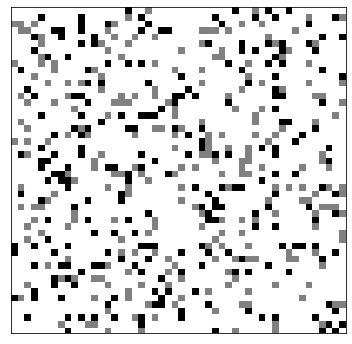

In [9]:
np.random.seed( 0 )#乱数のseedの設定（これを変えると結果が変わる）

#グラフを描くための設定
figsize =  (6,6*ROWS/COLS) if ROWS<COLS else (6*COLS/ROWS,6)
makersize = 300/COLS if ROWS<COLS else 300/ROWS
makersize *=makersize
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_xlim(-0.5,COLS-0.5)
ax.set_ylim(-0.5,ROWS-0.5)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
px = []
py = []
for i in range(ROWS*COLS):
    px.append(i//COLS)
    py.append(i%COLS)

#エージェントの生成と初期設定
A = [Agent(i) for i in range(ROWS*COLS)]
SetConnection(A)

#対戦の繰り返し
def update(k):
    pc = MakeField(A)#セルの初期化
    ax.scatter(py,px,c=pc,marker="s", s=makersize)#エージェントの描画
    plt.show()
    Play(A)
    
ani = animation.FuncAnimation(fig, update, interval = 100, frames = 10, repeat=False)
HTML(ani.to_jshtml())#notebookに表示

## Anacondaを利用した場合gifアニメーションが生成される

In [10]:
pip install Pillow 

Note: you may need to restart the kernel to use updated packages.


In [11]:
ani.save("PD_cell.gif")#gifアニメーションファイルの保存

MovieWriter ffmpeg unavailable; using Pillow instead.
